- https://github.com/kairess/image_mosaic/blob/master/kmnist_bw.ipynb

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [ ]:
default_path = '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/mini projects/'

In [ ]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Load and Resize Image

In [ ]:
img_path = default_path+'09.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(img.shape)

(426, 640)


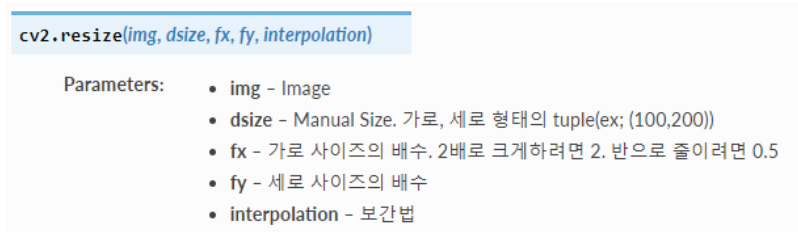

(85, 128)


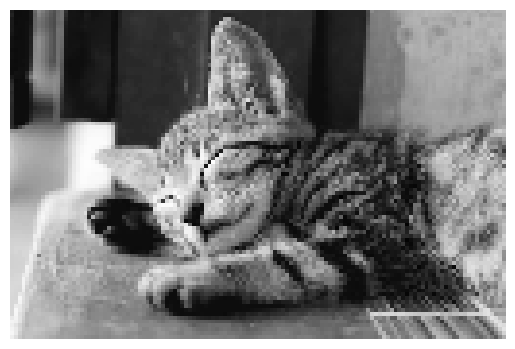

In [ ]:
img = cv2.resize(img, dsize=None, fx=0.2, fy=0.2)

print(img.shape)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Preview Patch Images

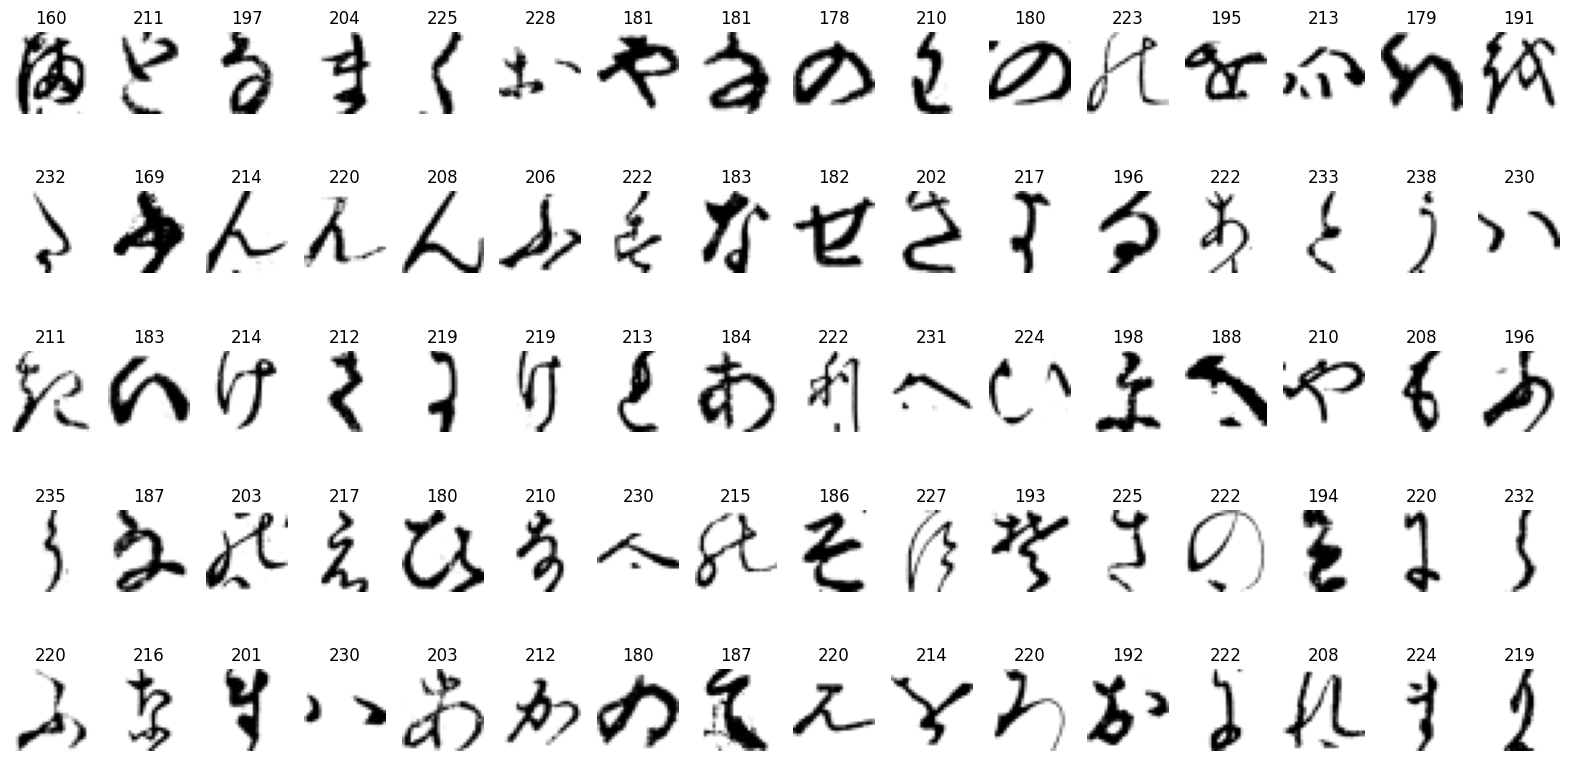

In [ ]:
sample_imgs = np.load(default_path+'k49-train-imgs.npz')['arr_0']

plt.figure(figsize=(20, 10))
for i in range(80):
    img_patch = 255 - sample_imgs[i]

    plt.subplot(5, 16, i+1)
    plt.title(int(np.mean(img_patch)))
    plt.axis('off')
    plt.imshow(img_patch, cmap='gray')

각 글자 이미지 크기 

In [ ]:
sample_imgs[i].shape

(28, 28)

# Distribution of Patch Images

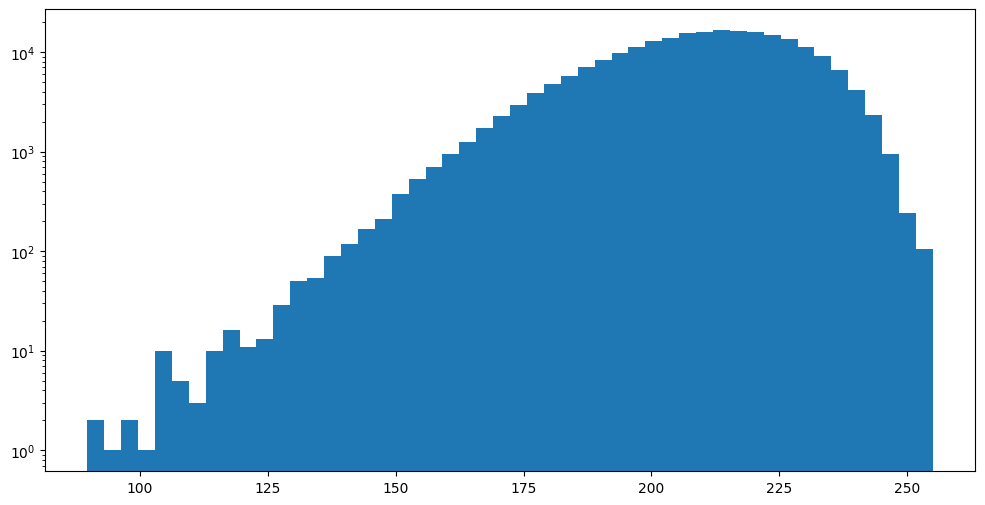

In [ ]:
means = np.mean(255 - sample_imgs, axis=(1, 2)) 

plt.figure(figsize=(12, 6))
plt.hist(means, bins=50, log=True)
plt.show()

In [ ]:
means[:5]

array([160.89668367, 211.74872449, 197.11734694, 204.53061224,
       225.55102041])

# Adjust MinMax of Input Image

## cv2.normalize()

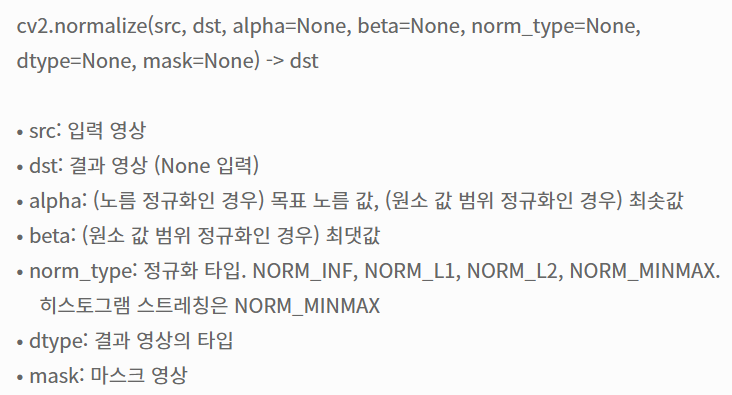

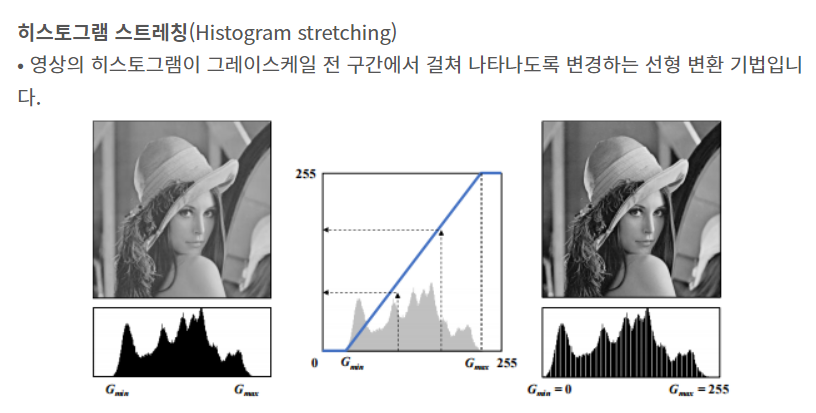

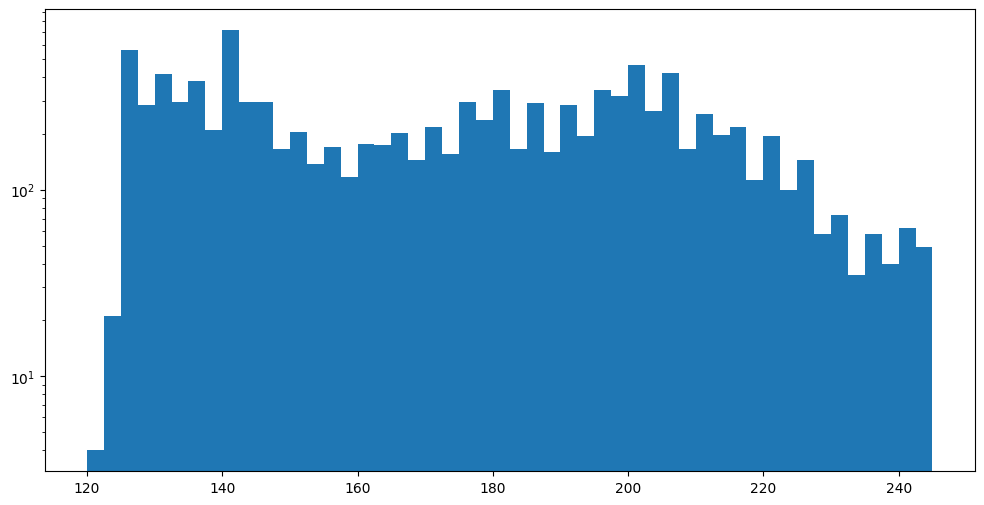

In [ ]:
normal_img = cv2.normalize(img, dst=None, alpha=120, beta=245, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))
plt.hist(normal_img.flatten(), bins=50, log=True)
plt.show()

In [ ]:
normal_img.shape

(85, 128)

In [ ]:
len(normal_img.flatten()) # 85 * 128

10880

In [ ]:
normal_img.flatten()[:5]

array([134, 127, 127, 127, 127], dtype=uint8)

In [ ]:
img[0][:5]

array([68, 56, 56, 57, 57], dtype=uint8)

# Organize Patch Images

In [ ]:
bins = defaultdict(list)

for img_patch, mean in zip(sample_imgs, means):
    bins[int(mean)].append(img_patch)
    
print(len(bins))

156


In [ ]:
len(bins[150]) # 평균 150인 글자 이미지가 107개 임!!

107

# Fill Images

In [ ]:
img.shape

(85, 128)

In [ ]:
normal_img.shape

(85, 128)

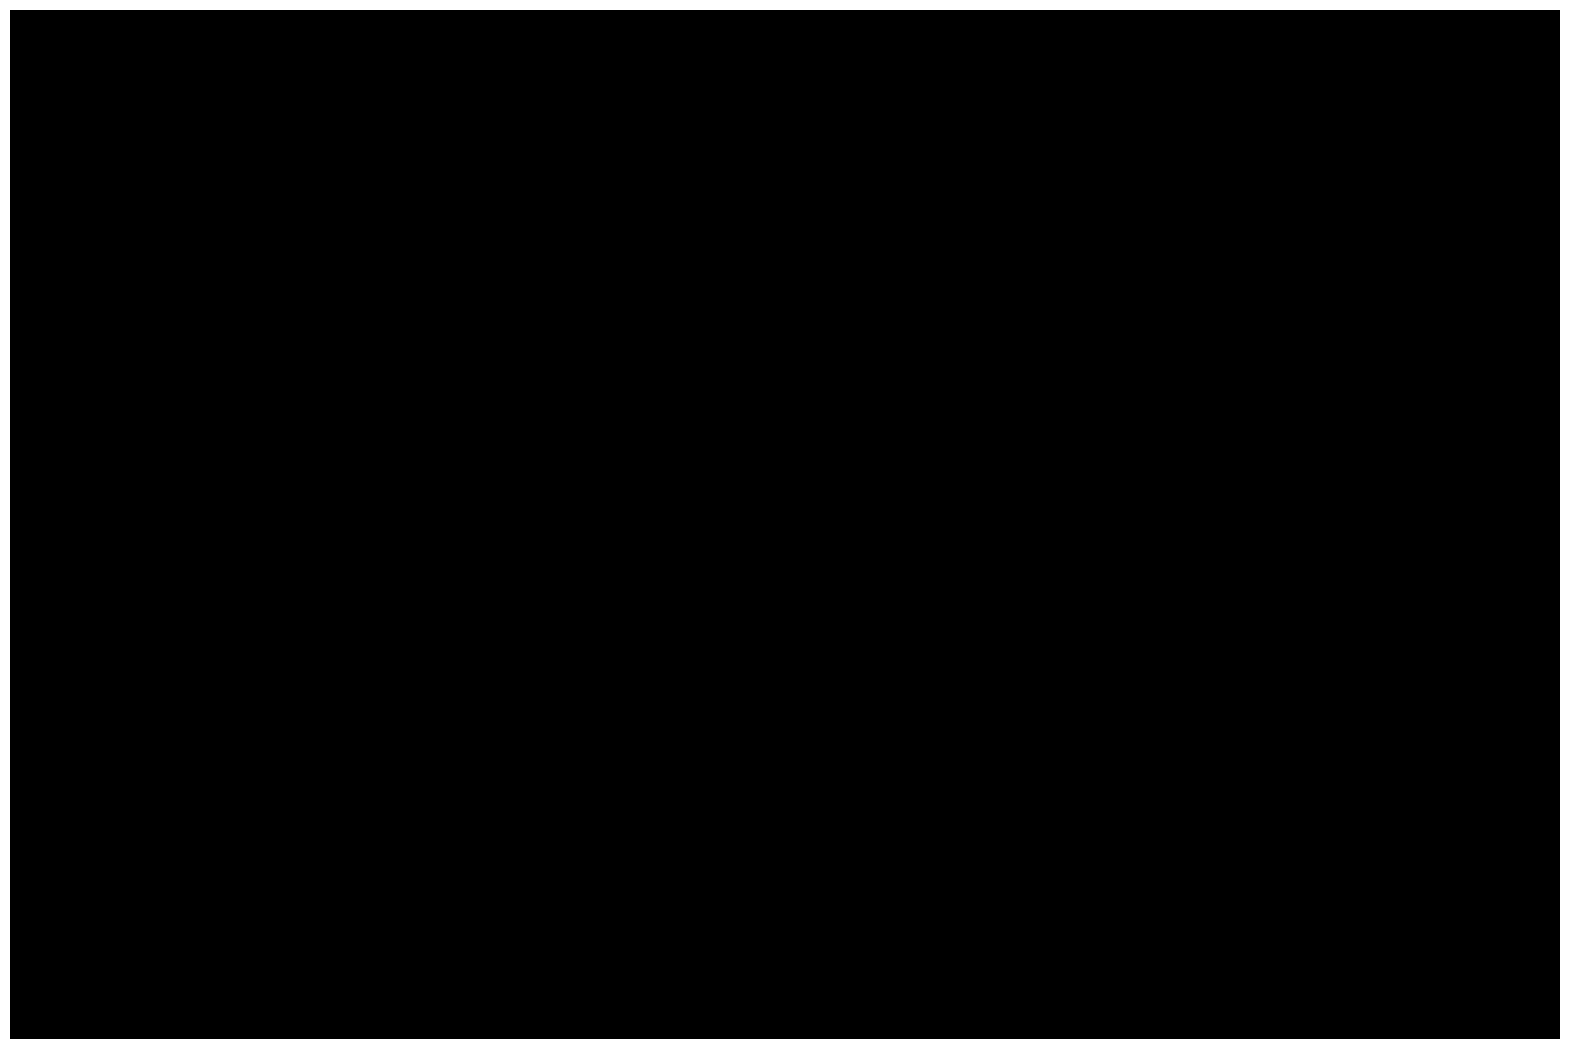

In [ ]:
h, w = normal_img.shape

img_out = np.zeros((h*28, w*28), dtype=np.uint8) # 글자 이미지 크기가 (28,28) 따라서 높이와 너비에 28을 곱함.

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img_out, cmap='gray')

In [ ]:
h, w = normal_img.shape

img_out = np.zeros((h*28, w*28), dtype=np.uint8)

for y in range(h):
    for x in range(w):
        level = normal_img[y, x] # 특정 픽셀의 노말라이즈 값 

        b = bins[level] # 해당 노말라이즈 값과 비슷한 문자 이미지 선택 

        while len(b) == 0: # 해당 이미지가 없다면, 옆에 있는 이미지 선택 
            level += 1
            b = bins[level]

        img_patch = 255 - b[np.random.randint(len(b))]  # 해당 글자 이미지들에서 렌덤으로 선택 

        img_out[y*28:(y+1)*28, x*28:(x+1)*28] = img_patch # 특정 픽셀의 위치에 해당 글자 적용 
        
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img_out, cmap='gray')

Output hidden; open in https://colab.research.google.com to view.